# Lab 2.3: Optimizing and Evaluating Deep Learning Models

## 1) Data Exploration 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('data/food_items.csv')
df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


In [55]:
features = len(df.count(0))
print('total features:', features)
features = len(df.count(1))
print('total features:', features)

total features: 18
total features: 13260


In [56]:
df.columns

Index(['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat',
       'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium',
       'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol',
       'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron', 'class'],
      dtype='object')

In [57]:
df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

### 1.4 Analyze the target column (last column): count class occurrences and assess class balance.

In [58]:
df['class'].value_counts() # count occurent of each value in class fol

class
'In Moderation'    6649
'Less Often'       5621
'More Often'        990
Name: count, dtype: int64

In [59]:
df.head(1)

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'


## 2) Data Preprocessing

Split feature (X) and labels (Y)

In [60]:
X = df.iloc[:, :-1]
X

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,140.0,5,1.0,0.0,0.0,0.0,0,60.0,23.0,2.0,13.0,0,2.0,0,0,0,4
13256,130.0,4,0.5,0.0,0.0,0.0,0,50.0,23.0,1.0,14.0,0,2.0,0,0,0,4
13257,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2
13258,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2


In [61]:
y = df.iloc[:, -1:]
y

,class
0,'In Moderation'
1,'In Moderation'
2,'In Moderation'
3,'In Moderation'
4,'In Moderation'
...,...
13255,'In Moderation'
13256,'In Moderation'
13257,'In Moderation'
13258,'In Moderation'


Normalize X using MinMaxScaler

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

`fit()` : used for generating learning model parameters from training data

`transform()` : parameters generated from fit() method,applied upon model to generate transformed data set.

`fit_transform()` : combination of fit() and transform() api on same data set

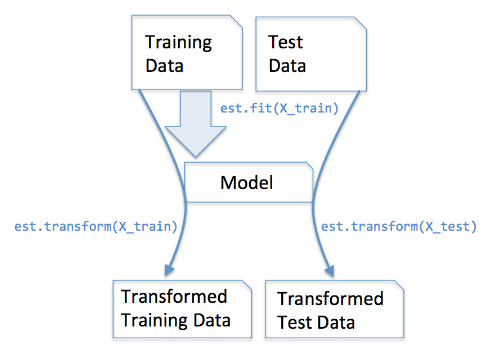

Imagine we are fitting a tokenizer, if we fit X we are including testing data into the tokenizer, but I have seen this error many times!

The correct is to fit ONLY with X_train, because you don't know "your future data" so you cannot use X_test data for fitting anything!

Then you can transform your test data, but separately, that's why there are different methods.

In [63]:
# Split dataset, stratify for class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(X_train.shape)
print(X_test.shape)

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

(10608, 17)
(2652, 17)


In [64]:
# Encode target if not numeric
from sklearn.calibration import LabelEncoder

encoder = LabelEncoder() # set id start from 0 to n label 
y_train = encoder.fit_transform(y_train) 
y_test = encoder.transform(y_test)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (10608, 17)
Test set size: (2652, 17)


d:\CODE\IDE\Anaconda\envs\vision\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\CODE\IDE\Anaconda\envs\vision\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


## 3) Logistic Regression Model

In [65]:
# Train logistic regression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Evaluate acuracy on test set
y_pred_lr = log_reg_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(acc_lr)

0.7858220211161387


## 4) Basic Multilayer Perceptron (MLP)

In [ ]:
# %pip install tensorflow
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

model_sgd = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),    
])
optimizer_sgd_no_momentum = SGD(learning_rate=0.01, momentum=0.0)
model_sgd.compile(optimizer=optimizer_sgd_no_momentum,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# stop if no improvement make after 5 epochs, always save the current best weights            
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

d:\CODE\IDE\Anaconda\envs\vision\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
#? Train the model
history_sgd_no_momentum = model_sgd.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4248 - loss: 0.6840 - val_accuracy: 0.4270 - val_loss: 0.6722
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4214 - loss: 0.6730 - val_accuracy: 0.4270 - val_loss: 0.6659
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4190 - loss: 0.6670 - val_accuracy: 0.4270 - val_loss: 0.6612
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4077 - loss: 0.6656 - val_accuracy: 0.4274 - val_loss: 0.6535
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4314 - loss: 0.6515 - val_accuracy: 0.4647 - val_loss: 0.6441
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4554 - loss: 0.6436 - val_accuracy: 0.4585 - val_loss: 0.6317
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4743 - loss: 0.6337 - val_accuracy: 0.4892 - val_loss: 0.6196
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5246 - loss: 0.6215 - val_accu

In [68]:
#? Evaluate accuracy
loss_sgd_no_momentum, acc_sgd_no_momentum = model_sgd.evaluate(X_test, y_test)
print("MLP (SGD no momentum) Accuracy:", acc_sgd_no_momentum)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6905 - loss: -0.6615
MLP (SGD no momentum) Accuracy: 0.6938160061836243


## 5) Momemtum Optimization

In [69]:
model_momentum = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

optimizer_momentum = SGD(learning_rate=0.01, momentum=0.9)
model_momentum.compile(optimizer=optimizer_momentum,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

history_momentum = model_momentum.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4286 - loss: 0.6703 - val_accuracy: 0.5118 - val_loss: 0.6203
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5663 - loss: 0.6050 - val_accuracy: 0.6202 - val_loss: 0.5314
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6514 - loss: 0.5245 - val_accuracy: 0.6706 - val_loss: 0.4678
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6492 - loss: 0.4750 - val_accuracy: 0.6607 - val_loss: 0.4239
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6539 - loss: 0.4362 - val_accuracy: 0.6503 - val_loss: 0.3952
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6672 - loss: 0.4144 - val_accuracy: 0.6598 - val_loss: 0.3551
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6655 - loss: 0.3664 - val_accuracy: 0.6692 - val_loss: 0.3002
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6806 - loss: 0.3336 - val_accu

In [70]:
# 5.2 Evaluate accuracy
loss_momentum, acc_momentum = model_momentum.evaluate(X_test, y_test)
print("MLP (Momentum) Accuracy:", acc_momentum)# 

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5154 - loss: 0.6238
MLP (Momentum) Accuracy: 0.5150829553604126


In [71]:
model_momentum_nesterov = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

optimizer_momentum_nesterov = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_momentum_nesterov.compile(optimizer=optimizer_momentum_nesterov,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

history_momentum_nesterov = model_momentum_nesterov.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4059 - loss: 0.6770 - val_accuracy: 0.4453 - val_loss: 0.6161
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5850 - loss: 0.5898 - val_accuracy: 0.5650 - val_loss: 0.5231
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - loss: 0.5083 - val_accuracy: 0.6692 - val_loss: 0.4522
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - loss: 0.4494 - val_accuracy: 0.6414 - val_loss: 0.4094
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6826 - loss: 0.4159 - val_accuracy: 0.6758 - val_loss: 0.3842
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6757 - loss: 0.3692 - val_accuracy: 0.6404 - val_loss: 0.3679
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6832 - loss: 0.3352 - val_accuracy: 0.6640 - val_loss: 0.2388
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6741 - loss: 0.2412 - val_accu

In [72]:
loss_momentum, acc_momentum = model_momentum_nesterov.evaluate(X_test, y_test)
print("MLP (Momentum) Accuracy:", acc_momentum)# 

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4398 - loss: 0.6210
MLP (Momentum) Accuracy: 0.44532427191734314


In [73]:
from tensorflow.keras.optimizers import Adam

model_momentum_adam = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

optimizer_momentum_adam = Adam(learning_rate=0.0001)
model_momentum_adam.compile(optimizer=optimizer_momentum_adam,
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

history_momentum_adam = model_momentum_adam.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1,  # 0 = silent, 1 = progress bar, 2 = one line per epoch
)

Epoch 1/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5544 - loss: 0.6553 - val_accuracy: 0.6494 - val_loss: 0.5083
Epoch 2/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6469 - loss: 0.4977 - val_accuracy: 0.6635 - val_loss: 0.4150
Epoch 3/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6702 - loss: 0.4163 - val_accuracy: 0.6711 - val_loss: 0.3544
Epoch 4/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6752 - loss: 0.3565 - val_accuracy: 0.6871 - val_loss: 0.2943
Epoch 5/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6906 - loss: 0.3006 - val_accuracy: 0.7224 - val_loss: 0.2493
Epoch 6/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7121 - loss: 0.2404 - val_accuracy: 0.7276 - val_loss: 0.1794
Epoch 7/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7269 - loss: 0.1715 - val_accuracy: 0.7262 - val_loss: 0.0982
Epoch 8/100
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7307 - loss: 0.1114 - val_accu

In [74]:
loss_momentum, acc_momentum = model_momentum_adam.evaluate(X_test, y_test)
print("MLP (Momentum) Accuracy:", acc_momentum)# 

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6922 - loss: -251.9148
MLP (Momentum) Accuracy: 0.6904222965240479


1) Load data with `fashion_mnist.load_data()`.
2) Normalize the pixel values to [0,1].
3) Flatten each 28×28 image into a single 784-dimensional vector.
4) Convert labels (0–9) to one-hot encoding.
5) Build a simple MLP 
6) Train with different optimizers (SGD vs. SGD+momentum vs. Adam).
7) Compare test set accuracy.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 8.1 Load the Fashion MNIST dataset
(X_train_fmnist, y_train_fmnist), (X_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

# Normalize the data
X_train_fmnist = X_train_fmnist / 255.0
X_test_fmnist = X_test_fmnist / 255.0

# Flatten images (28x28) to 784-dim vectors
X_train_fmnist = X_train_fmnist.reshape(-1, 784)
X_test_fmnist = X_test_fmnist.reshape(-1, 784)

# Convert labels to one-hot vectors
y_train_fmnist = to_categorical(y_train_fmnist, 10)
y_test_fmnist = to_categorical(y_test_fmnist, 10)

# 8.2 Build a simple model function to reuse
def build_fmnist_model(optimizer):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
global_epoch = 50

#? 1) Train with plain SGD
model_fmnist_sgd = build_fmnist_model(SGD(learning_rate=0.01))
history_fmnist_sgd = model_fmnist_sgd.fit(
    X_train_fmnist, y_train_fmnist,
    validation_split=0.2,
    epochs=global_epoch,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


loss_sgd, acc_sgd = model_fmnist_sgd.evaluate(X_test_fmnist, y_test_fmnist)

# 8.2 Compare the test accuracies among these three runs
print("Fashion MNIST - MLP with plain SGD:", acc_sgd)
# print for momentum, Adam after you train them

d:\CODE\IDE\Anaconda\envs\vision\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5877 - loss: 1.3383 - val_accuracy: 0.7828 - val_loss: 0.6366
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7992 - loss: 0.6026 - val_accuracy: 0.8188 - val_loss: 0.5330
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8207 - loss: 0.5204 - val_accuracy: 0.8247 - val_loss: 0.4953
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8339 - loss: 0.4788 - val_accuracy: 0.8318 - val_loss: 0.4728
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8379 - loss: 0.4623 - val_accuracy: 0.8419 - val_loss: 0.4521
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8448 - loss: 0.4435 - val_accuracy: 0.8434 - val_loss: 0.4445
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8491 - loss: 0.4299 - val_accuracy: 0.8490 - val_loss: 0.4350
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8553 - loss: 0.4178 - val_accuracy: 0.

In [77]:
#? 2) Use nesterov optimizer
optimizer_momentum = SGD(learning_rate=0.01, momentum=0.9)
model_fmnist_sgd = build_fmnist_model(optimizer_momentum)
history_fmnist_sgd = model_fmnist_sgd.fit(
    X_train_fmnist, y_train_fmnist,
    validation_split=0.2,
    epochs=global_epoch,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

loss_sgd, acc_sgd = model_fmnist_sgd.evaluate(X_test_fmnist, y_test_fmnist)

# 8.2 Compare the test accuracies among these three runs
print("Fashion MNIST - MLP with plain SGD:", acc_sgd)
# print for momentum, Adam after you train them


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7118 - loss: 0.8344 - val_accuracy: 0.8332 - val_loss: 0.4590
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8446 - loss: 0.4336 - val_accuracy: 0.8506 - val_loss: 0.4086
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8591 - loss: 0.3886 - val_accuracy: 0.8617 - val_loss: 0.3831
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8725 - loss: 0.3499 - val_accuracy: 0.8698 - val_loss: 0.3631
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8816 - loss: 0.3300 - val_accuracy: 0.8675 - val_loss: 0.3584
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8835 - loss: 0.3188 - val_accuracy: 0.8771 - val_loss: 0.3356
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.3067 - val_accuracy: 0.8767 - val_loss: 0.3453
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8928 - loss: 0.2896 - val_accuracy: 0.

In [78]:
#? 2) Use nesterov optimizer
optimizer_momentum_nesterov = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

model_fmnist_sgd = build_fmnist_model(optimizer_momentum_nesterov)
history_fmnist_sgd = model_fmnist_sgd.fit(
    X_train_fmnist, y_train_fmnist,
    validation_split=0.2,
    epochs=global_epoch,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

loss_sgd, acc_sgd = model_fmnist_sgd.evaluate(X_test_fmnist, y_test_fmnist)

# 8.2 Compare the test accuracies among these three runs
print("Fashion MNIST - MLP with plain SGD:", acc_sgd)
# print for momentum, Adam after you train them


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7029 - loss: 0.8534 - val_accuracy: 0.8376 - val_loss: 0.4665
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8474 - loss: 0.4314 - val_accuracy: 0.8485 - val_loss: 0.4263
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8623 - loss: 0.3796 - val_accuracy: 0.8590 - val_loss: 0.3914
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8730 - loss: 0.3516 - val_accuracy: 0.8647 - val_loss: 0.3898
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8785 - loss: 0.3363 - val_accuracy: 0.8642 - val_loss: 0.3722
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8866 - loss: 0.3130 - val_accuracy: 0.8667 - val_loss: 0.3714
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8898 - loss: 0.2972 - val_accuracy: 0.8761 - val_loss: 0.3450
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8949 - loss: 0.2838 - val_accuracy: 0.

In [ ]:
#? 3) Adam
optimizer_momentum_adam = Adam(learning_rate=0.001)
model_fmnist_sgd = build_fmnist_model(optimizer_momentum_adam)
history_fmnist_sgd = model_fmnist_sgd.fit(
    X_train_fmnist, y_train_fmnist,
    validation_split=0.2,
    epochs=global_epoch,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

loss_sgd, acc_sgd = model_fmnist_sgd.evaluate(X_test_fmnist, y_test_fmnist)

# 8.2 Compare the test accuracies among these three runs
print("Fashion MNIST - MLP with plain SGD:", acc_sgd)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7554 - loss: 0.7177 - val_accuracy: 0.8480 - val_loss: 0.4246
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.3877 - val_accuracy: 0.8562 - val_loss: 0.4075
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8733 - loss: 0.3441 - val_accuracy: 0.8718 - val_loss: 0.3520
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.3099 - val_accuracy: 0.8767 - val_loss: 0.3359
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8901 - loss: 0.2984 - val_accuracy: 0.8846 - val_loss: 0.3293
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8949 - loss: 0.2833 - val_accuracy: 0.8828 - val_loss: 0.3309
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8982 - loss: 0.2736 - val_accuracy: 0.8836 - val_loss: 0.3298
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9036 - loss: 0.2556 - val_accuracy: 0.